#### Задание
Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф" и сохранить результаты в pandas dataframe. Либо загрузите из pickle-файла df_nashdomrf.pkl, если не получается скачать.
Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных:
1. Привести колонки датафрейма к одному типу данных. 
2. Проверить индекс, чтобы он соответствовал порядку строк. 
3. Проверить наличие пропусков и в случае обнаружения, определить стратегию их обработки (например, заменить медианой, 0, -99999, удалить наблюдения с пропусками).

4. Провести мини-исследование рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.
5. Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены. 
6. Рассчитать объемы вводимого жилья по регионам и по годам. 
7. Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах. 
8. Визуализировать разброс, связь и распределение этих показателей по регионам. 
9. Сделать выводы по каждому из расчетов и графиков

In [1]:
import requests
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
offset_ = 1 # сколько элементов спарсить
limit_ = 1000 # количество объектов в на странице
url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/places?offset={offset_}&limit={limit_}&searchValue='
# url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
# зашел на сайт наш дом.рф нажал на на инструменты разработчика, на вкладке -сеть при нажатии на следующую страницу
# появилась данная ссылка, стандартно выводит по 10 объектов
# url =f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/erz/main/filter?offset={offset_}&limit={limit_}&sortField=devShortNm&sortType=asc'
# offset при переходе на следующую страницу увеличивается на 10, 10.20.30, а Limit на 10
res = requests.get(url)

objects_data = res.json()
objects_data.get('data').get('list')[0]

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [3]:
res

<Response [200]>

In [4]:
with open('df_nashdomrf.pkl', 'rb') as f:
    df_cop = pickle.load(f)
df_cop.head()

,id,hobjId,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,...,metro.time,metro.isWalk,metro.colors,complexShortNm,airQualityIndexValue,greenAreaIndexValue,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm
0,13399,34754,28141,72,"г Тюмень, ул Профсоюзная, д. 56",1,1,0,2024-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13397,37201,28141,72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13383,39024,28105,72,"г Тюмень, ул Профсоюзная, д. 56",4,20,68,2023-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13398,37165,28141,72,"г Тюмень, ул Профсоюзная, д. 56",7,10,43,2024-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13391,37219,28101,72,"г Тюмень, ул Профсоюзная, д. 56",3,12,44,2023-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#просмотреть все столбцы
pd.set_option('display.max_columns', None)
df_cop.head(3)

,id,hobjId,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,objLkFreePlanDesc,objElemParkingCnt,objSquareLiving,rpdNum,rpdPdfLink,rpdIssueDttm,objLkLatitude,objLkLongitude,objCompensFundFlg,objProblemFlg,objLkClassDesc,loadDttm,photoRenderDTO,objGuarantyEscrowFlg,objectType,miniUrl,residentialBuildings,newBuildingId,objFloorCnt,objFlatCnt,objFlatSq,objNonlivElemCnt,objStatus,isAvailableWantLiveHere,objTransferPlanDt,objInfrstrBicycleLaneFlg,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objInfrstrTrashAreaCnt,objInfrstrObjPrkngCnt,objInfrstrNotObjPrkngCnt,objInfrstrRampFlg,objInfrstrCurbLoweringFlg,objElevatorWheelchairCnt,objElevatorPassengerCnt,objElevatorCargoCnt,objElevatorCargoPassengerCnt,soldOutPerc,objPriceAvg,generalContractorNm,nonlivFirstFloor,objectTransportInfo,conclusion,objLkSaleDepEmail,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,developer.devId,developer.devShortCleanNm,developer.devShortNm,developer.devFullCleanNm,developer.problObjCnt,developer.buildObjCnt,developer.comissObjCnt,developer.regRegionDesc,developer.devPhoneNum,developer.devSite,developer.devEmail,developer.devInn,developer.devOgrn,developer.devKpp,developer.devLegalAddr,developer.devFactAddr,developer.lastRpdId,developer.fundGuarantyFlg,developer.devOrgRegRegionCd,developer.devEmplMainFullNm,developer.developerGroupName,developer.orgForm.id,developer.orgForm.fullForm,developer.orgForm.shortForm,developer.companyGroupId,developer.objGuarantyEscrowFlg,developer.govFundFlg,objLivCeilingHeight,quartography.objLivElem1KCnt,quartography.objLivElem2KCnt,quartography.objLivElem3KCnt,quartography.objLivElem4KCnt,quartography.objLivElemCnt,quartography.objLivElemEntrCnt,quartography.objLivElemEntrFloorAvg,nameObj,transportDistIndex,transportDistIndexValue,metro.id,metro.name,metro.line,metro.color,metro.time,metro.isWalk,metro.colors,complexShortNm,airQualityIndexValue,greenAreaIndexValue,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm
0,13399,34754,28141,72,"г Тюмень, ул Профсоюзная, д. 56",1,1,0,2024-12-31,Другое,Без отделки,Нет,125,0.00,72-000097,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,08-12-2023 15:23,57.1519,65.5544,0,0,Элитный,16-12-2023 01:38,"[{'objId': 13399, 'pdId': 28141, 'rpdId': 8028...",0,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,0,34754,1,0,0.0,0,0,True,28-02-2025 12:00,0,0.0,0.0,1.0,0.0,0.0,1,1,0.0,8.0,7.0,15,0.917243,50768.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),1.0,[],False,info@2mengroup.ru,0,B,10.0,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",804699,1,72.0,Киселев Сергей Михайлович,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,1,Акционерное общество,АО,5776.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13397,37201,28141,72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,Другое,Без отделки,Нет,0,6251.10,72-000097,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,08-12-2023 15:23,57.1519,65.5544,0,0,Элитный,16-12-2023 01:38,"[{'objId': 13397, 'pdId': 28141, 'rpdId': 8028...",0,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,1,37201,12,65,6251.1,70,0,True,28-02-2025 12:00,0,1.0,1.0,1.0,11.0,10.0,1,1,0.0,5.0,4.0,9,0.999984,47163.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),0.0,[],False,info@2mengroup.ru,0,B,10.0,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",804699,1,72.0,Киселев Сергей Михайлович,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,1,Акционерное общество,АО,5776.0,0,0,"2,96",0.0,24.0,

In [6]:
#Удаляем ненужные столбцы
df=df_cop.drop(['hobjId',
                 'pdId',
                  'objLkFreePlanDesc',
                  'rpdNum',
                  'rpdPdfLink',
                  'rpdIssueDttm',
                  'objCompensFundFlg',
                  'objProblemFlg',
                  'loadDttm',
                  'photoRenderDTO',
                  'objGuarantyEscrowFlg',
                  'objectType',
                  'miniUrl',
                  'newBuildingId',
                  'objFloorCnt',
                  'objFlatSq',
                  'objNonlivElemCnt',
                  'isAvailableWantLiveHere',
                  'objInfrstrBicycleLaneFlg',
                  'objInfrstrPlaygrndCnt',
                  'objInfrstrTrashAreaCnt',
                  'objInfrstrObjPrkngCnt',
                  'objInfrstrNotObjPrkngCnt',
                  'objInfrstrRampFlg',
                  'objInfrstrCurbLoweringFlg',
                  'objElevatorWheelchairCnt',
                  'objElevatorCargoCnt',
                  'soldOutPerc',
                  'nonlivFirstFloor',
                  'objectTransportInfo',
                  'conclusion',
                  'objLkSaleDepEmail',
                  'objGreenHouseFlg',
                  'objEnergyEffShortDesc',
                  'infrastructureIndexValue',
                  'developer.devId',
                  'generalContractorNm',
                  'developer.devShortNm',
                  'developer.devFullCleanNm',
                  'developer.problObjCnt',
                  'developer.buildObjCnt',
                  'developer.comissObjCnt',
                  'developer.regRegionDesc',
                  'developer.devSite',
                  'developer.devEmail',
                  'developer.devOgrn',
                  'developer.devKpp',
                  'developer.devLegalAddr',
                  'developer.devFactAddr',
                  'developer.lastRpdId',
                  'developer.fundGuarantyFlg',
                  'developer.devOrgRegRegionCd',
                  'developer.devEmplMainFullNm',
                  'developer.developerGroupName',
                  'developer.orgForm.id',
                  'developer.orgForm.fullForm',
                  'developer.orgForm.shortForm',
                  'developer.companyGroupId',
                  'developer.objGuarantyEscrowFlg',
                  'developer.govFundFlg',
                  'objLivCeilingHeight',
                  'quartography.objLivElem1KCnt',
                  'quartography.objLivElem2KCnt',
                  'quartography.objLivElem3KCnt',
                  'quartography.objLivElem4KCnt',
                  'quartography.objLivElemCnt',
                  'quartography.objLivElemEntrCnt',
                  'quartography.objLivElemEntrFloorAvg',
                  'nameObj',
                  'transportDistIndex',
                  'transportDistIndexValue',
                  'metro.id',
                  'metro.name',
                  'metro.line',
                  'metro.color',
                  'metro.time',
                  'metro.isWalk',
                  'metro.colors',
                  'complexShortNm',
                  'airQualityIndexValue',
                  'greenAreaIndexValue',
                  'developer.bankruptStage.bankruptStageCd',
                  'developer.bankruptStage.bankruptStageDesc',
                  'developer.bankruptStage.bankruptLawUrl',
                  'developer.orgBankruptMsgDttm',
                  'wallMaterialShortDesc',
                  'objLkFinishTypeDesc',
                  'objTransferPlanDt',
                  'objElevatorPassengerCnt',
                  'objElevatorCargoPassengerCnt',
                  'developer.devShortCleanNm',
                  'developer.devPhoneNum',
                  'developer.devInn'], axis=1)
#переименовать столбцы
df=df.rename(columns={'objElemLivingCnt':'Kol_kvart',
                      'objSquareLiving':'Zilaya_plosh',
                      'objReady100PercDt':'SdachaDoma',
                      'objElemParkingCnt':'Parking',
                      'objLkClassDesc':'ClassDom',
                      'residentialBuildings':'Status',
                      'objLkLatitude':'Shirota',
                      'objLkLongitude':'Dolgota',
                      'objFlatCnt':'KolKvartir',
                      'objInfrstrSportGroundCnt':'SportPlochadka',
                      'objPriceAvg':'AvgPrice'})
df.head(3)

,id,region,address,floorMin,floorMax,Kol_kvart,SdachaDoma,Parking,Zilaya_plosh,Shirota,Dolgota,ClassDom,Status,KolKvartir,objStatus,SportPlochadka,AvgPrice
0,13399,72,"г Тюмень, ул Профсоюзная, д. 56",1,1,0,2024-12-31,125,0.00,57.1519,65.5544,Элитный,0,0,0,0.0,50768.0
1,13397,72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,0,6251.10,57.1519,65.5544,Элитный,1,65,0,1.0,47163.0
2,13383,72,"г Тюмень, ул Профсоюзная, д. 56",4,20,68,2023-12-31,36,6423.85,57.1519,65.5536,Элитный,1,68,0,1.0,67159.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11714 entries, 0 to 11713
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11714 non-null  int64  
 1   region          11714 non-null  int64  
 2   address         11714 non-null  object 
 3   floorMin        11714 non-null  int64  
 4   floorMax        11714 non-null  int64  
 5   Kol_kvart       11714 non-null  int64  
 6   SdachaDoma      11714 non-null  object 
 7   Parking         11714 non-null  int64  
 8   Zilaya_plosh    11714 non-null  float64
 9   Shirota         11714 non-null  object 
 10  Dolgota         11714 non-null  object 
 11  ClassDom        11714 non-null  object 
 12  Status          11714 non-null  int64  
 13  KolKvartir      11714 non-null  int64  
 14  objStatus       11714 non-null  int64  
 15  SportPlochadka  11697 non-null  float64
 16  AvgPrice        8095 non-null   float64
dtypes: float64(3), int64(9), object

In [8]:
df['SportPlochadka'] = df['SportPlochadka'].replace(np.nan, 0)
#для подсчета среднего нельзя нули проставлять
#df['AvgPrice'] = df['AvgPrice'].replace(np.nan, 0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11714 entries, 0 to 11713
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11714 non-null  int64  
 1   region          11714 non-null  int64  
 2   address         11714 non-null  object 
 3   floorMin        11714 non-null  int64  
 4   floorMax        11714 non-null  int64  
 5   Kol_kvart       11714 non-null  int64  
 6   SdachaDoma      11714 non-null  object 
 7   Parking         11714 non-null  int64  
 8   Zilaya_plosh    11714 non-null  float64
 9   Shirota         11714 non-null  object 
 10  Dolgota         11714 non-null  object 
 11  ClassDom        11714 non-null  object 
 12  Status          11714 non-null  int64  
 13  KolKvartir      11714 non-null  int64  
 14  objStatus       11714 non-null  int64  
 15  SportPlochadka  11714 non-null  float64
 16  AvgPrice        8095 non-null   float64
dtypes: float64(3), int64(9), object

In [10]:
df = df.astype({'address':'string'})
df = df.astype({'ClassDom':'string'})
df = df.astype({'Shirota':'float'})
df = df.astype({'Dolgota':'float'})

In [12]:
df['SdachaDoma'] = pd.to_datetime(df['SdachaDoma'])

In [13]:
df.dtypes

id                         int64
region                     int64
address           string[python]
floorMin                   int64
floorMax                   int64
Kol_kvart                  int64
SdachaDoma        datetime64[ns]
Parking                    int64
Zilaya_plosh             float64
Shirota                  float64
Dolgota                  float64
ClassDom          string[python]
Status                     int64
KolKvartir                 int64
objStatus                  int64
SportPlochadka           float64
AvgPrice                 float64
dtype: object

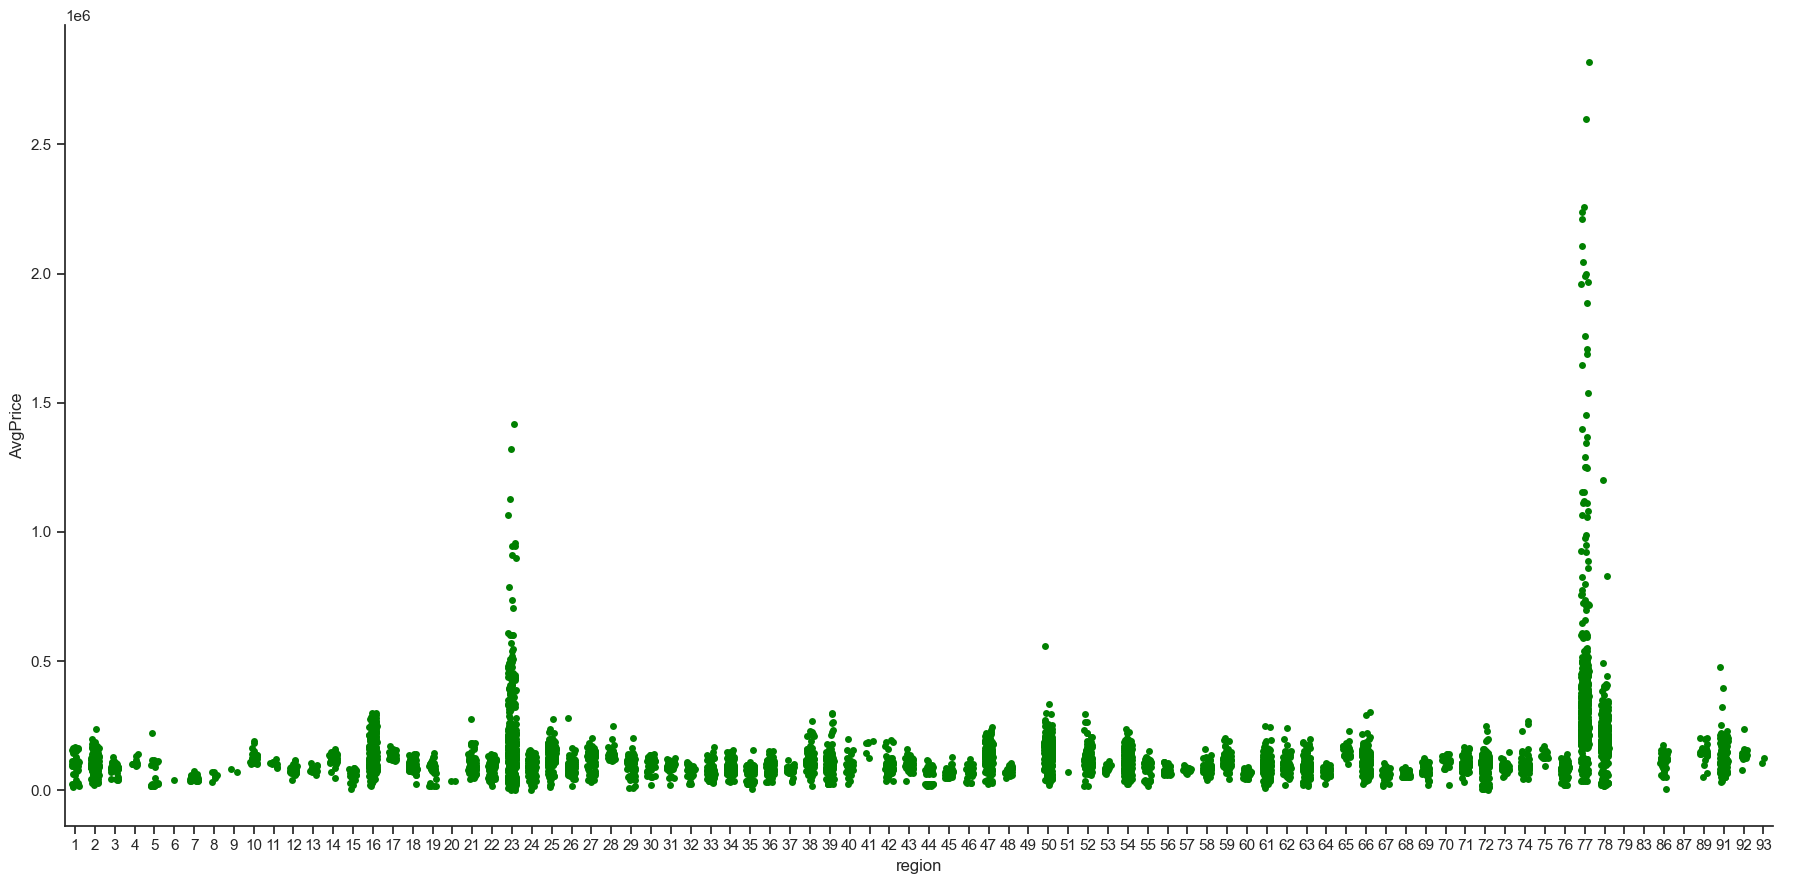

In [14]:
# Указываем стоимость метра в каждом ЖК по регионам
sns.set(style="ticks", color_codes=True)
sns.catplot(
    x='region',
    y='AvgPrice', 
    data=df, 
    jitter=0.2,
    height=9, 
    aspect=2,
    color='green',
    kind='strip', 
    dodge=True)

чем выше цена тем точек меньше, в основном больше по нижней цене

<Axes: xlabel='region'>

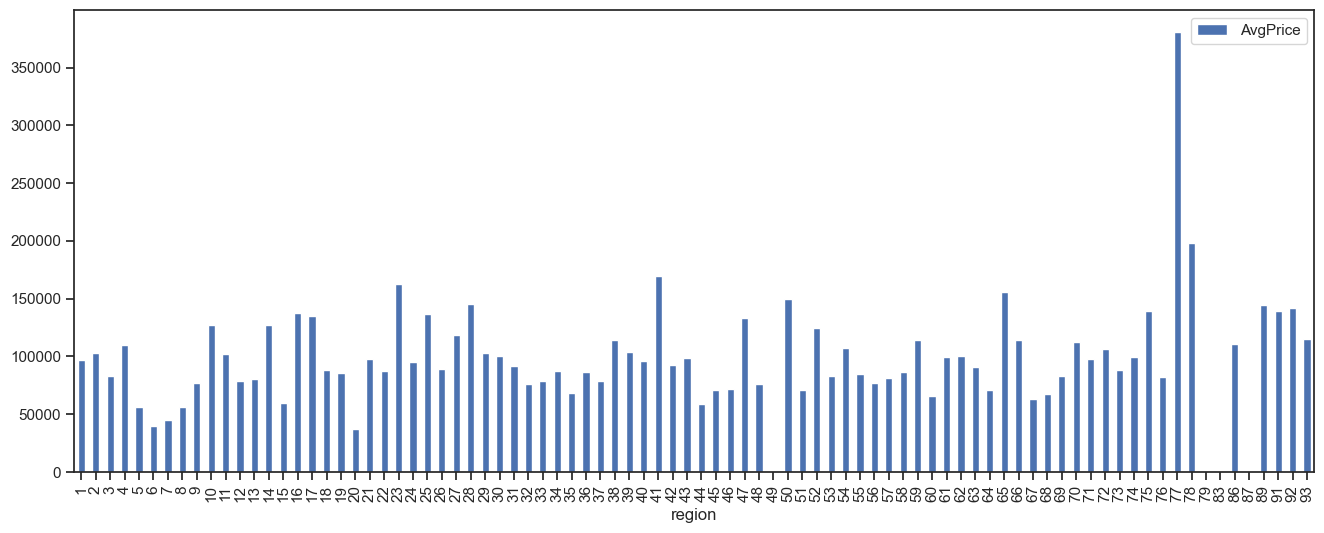

In [15]:
# группируем по регионам все цены и агрегируем как среднее значение в ригионе
df_mean_price = df.groupby('region').agg({'AvgPrice': 'mean','Shirota': 'mean','Dolgota': 'mean'}).reset_index()
df_mean_price.plot(x='region', y='AvgPrice', kind='bar', figsize=(16 , 6))

у Москвы средняя цена за метр всех больше и находится в лидирующих позициях. Питер на ряду с другими крупными городами почти.

<Axes: xlabel='Shirota', ylabel='Dolgota'>

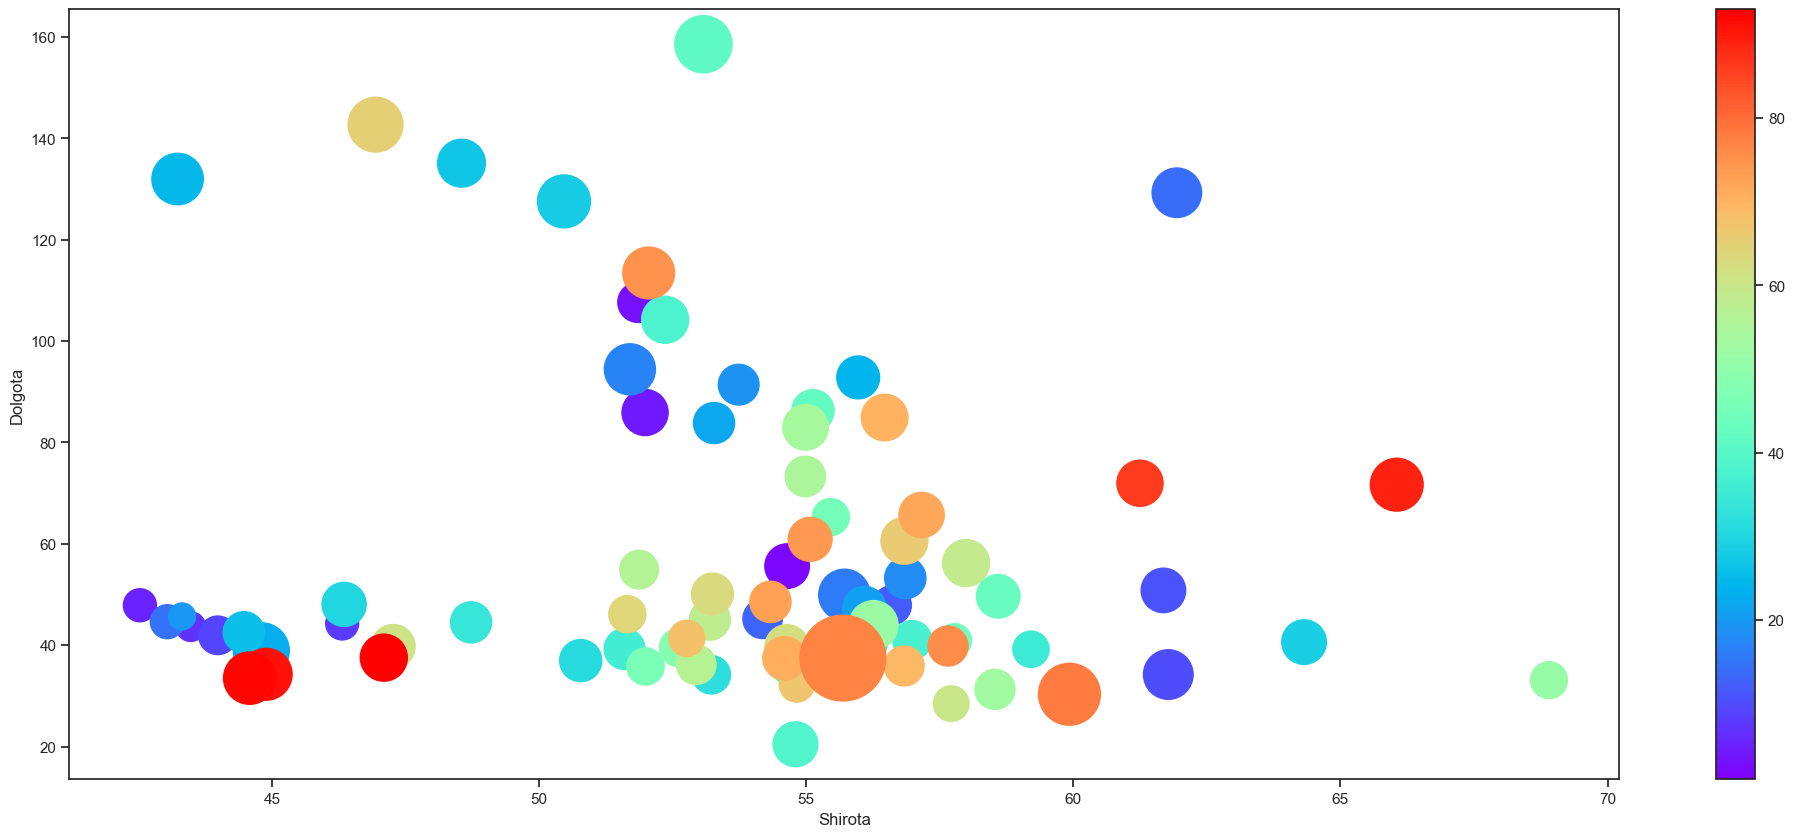

In [17]:
# на графике построим точки со средней ценой по регионам показывая размером самою большую цену
df_mean_price['region']
df_mean_price.plot.scatter(x='Shirota', y='Dolgota', c=color, s=df_mean_price['AvgPrice']/100, figsize=(25 , 10), cmap='rainbow')